In [45]:
import cv2
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [50]:
for path in pathlib.Path(r"C:\Users\33649\Documents\ROI Database\NIR").iterdir():
    i=1
    for path2 in pathlib.Path(path).iterdir():
        img=cv2.imread(r"%s"%path2)
        
        img=increase_contrast(cv2.cvtColor(img, cv2.COLOR_BGR2HLS))
        try:
            os.mkdir("Augmented_data/%s"%str(path).split("\\")[-1])
        except:
            ""
        plt.imsave("Augmented_data/%s/Image_%s.jpg"%(str(path).split("\\")[-1],i),sp_noise(img,0.05))
        i+=1
        plt.imsave("Augmented_data/%s/Image_%s.jpg"%(str(path).split("\\")[-1],i),increase_brightness(img))
        i+=1
        plt.imsave("Augmented_data/%s/Image_%s.jpg"%(str(path).split("\\")[-1],i),decrease_brightness(img))
        i+=1
        plt.imsave("Augmented_data/%s/Image_%s.jpg"%(str(path).split("\\")[-1],i),flip(img,1))
        i+=1
        plt.imsave("Augmented_data/%s/Image_%s.jpg"%(str(path).split("\\")[-1],i),flip(img,-1))
        i+=1
        plt.imsave("Augmented_data/%s/Image_%s.jpg"%(str(path).split("\\")[-1],i),blur(img))
       
       
        

In [35]:
def increase_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=50., tileGridSize=(8,8))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels
    l2 = clahe.apply(l)  # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))  # merge channels
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    return img 


def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

def flip(img,direction):
    return cv2.flip(img, direction)

def blur(img):
    return cv2.GaussianBlur(img, (11, 11), 0)

def decrease_brightness(img, value=100):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 0 + value
    v[v < lim] = 0
    v[v >= lim] -= value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img    

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

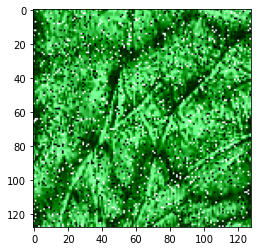

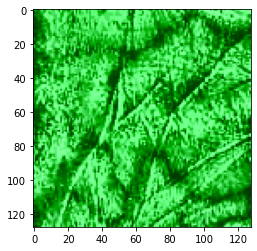

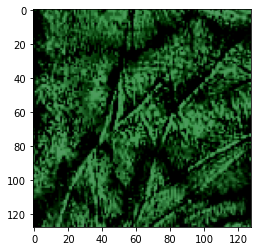

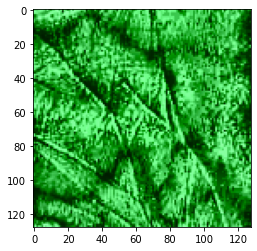

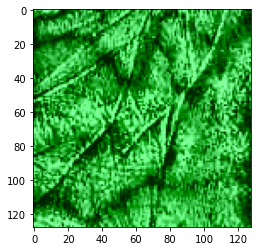

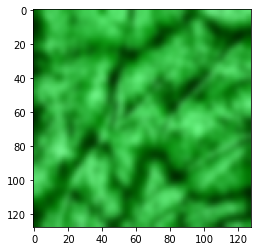

In [36]:
img=cv2.imread(r"C:\Users\33649\Documents\ROI Database\NIR\0001\1_01_s.jpg")
img=increase_contrast(cv2.cvtColor(img, cv2.COLOR_BGR2HLS))

plt.imshow(sp_noise(img,0.05))
plt.show()
plt.imshow(increase_brightness(img))
plt.show()
plt.imshow(decrease_brightness(img))
plt.show()
plt.imshow(flip(img,1))
plt.show()
plt.imshow(flip(img,-1))
plt.show()
plt.imshow(blur(img))
plt.show()

In [44]:
import os
os.mkdir("Augmented_data\ejfn")